In [10]:
import sys
sys.path.append('./src')

import io_utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from metrics import unique_products, category_revenue
from metrics import units_per_city, top_cities, category_per_city
from metrics import revenue_by_month, revenue_by_day_of_month
from metrics import detect_anomalies

import viz

df = io_utils.get_df()


### 1. Vad säljer vi? – vilka kategorier driver mest intäkt?
- Kategorier 'Electronics', 'Sports' respektive ' Clothing' driver mest intäkt.

In [11]:
print(f"Vi säljer följande unika kategorier: \n {unique_products}")

print(f"\nIntäkt per kategori: \n {category_revenue}")

Vi säljer följande unika kategorier: 
 ['Sports' 'Clothing' 'Home' 'Electronics' 'Toys' 'Beauty']

Intäkt per kategori: 
 category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Home            511070.87
Beauty          163053.97
Toys            143015.99
Name: revenue, dtype: float64


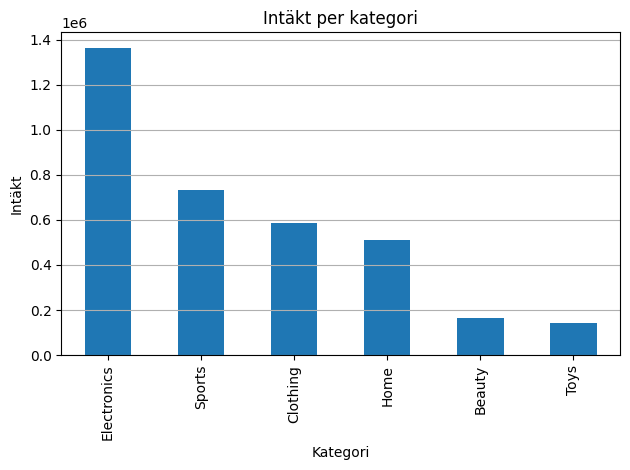

In [12]:
fig, ax =plt.subplots()
category_revenue.plot(kind="bar", ax=ax)
ax.set_title("Intäkt per kategori")
ax.set_xlabel("Kategori")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

* Ett stapeldiagram som jämför den totala intäkten för olika produktkategorier
* Varje stapel representerar en specifik produktkategori

### 2. Var säljer vi? – vilka städer står för störst intäkt?
- Stockholm, Göteborg respektive Malmö står för störst intakt.

In [13]:
top_cities # sum of revenue per city

,revenue
city,
Stockholm,1227201.94
Göteborg,859019.65
Malmö,567926.32
Uppsala,551478.42
Västerås,297140.90


In [14]:
units_per_city #sum of units per category and city

category,Beauty,Clothing,Electronics,Home,Sports,Toys
city,,,,,,
Göteborg,162,338,425,364,341,158
Malmö,95,228,313,215,247,113
Stockholm,223,574,599,419,539,265
Uppsala,99,303,293,171,178,121
Västerås,80,212,123,109,96,60


In [15]:
category_per_city #sum of revenue per category and city.

category,Beauty,Clothing,Electronics,Home,Sports,Toys
city,,,,,,
Göteborg,42693.20,128566.21,340629.30,137851.89,173114.39,36164.66
Malmö,22151.71,77554.64,234714.72,89276.45,123529.32,20699.48
Stockholm,50001.83,206055.77,457852.44,166671.91,292130.97,54489.02
Uppsala,27956.39,102399.82,236362.78,71514.22,92307.53,20937.68
Västerås,20250.84,72168.47,94668.83,45756.40,53571.21,10725.15


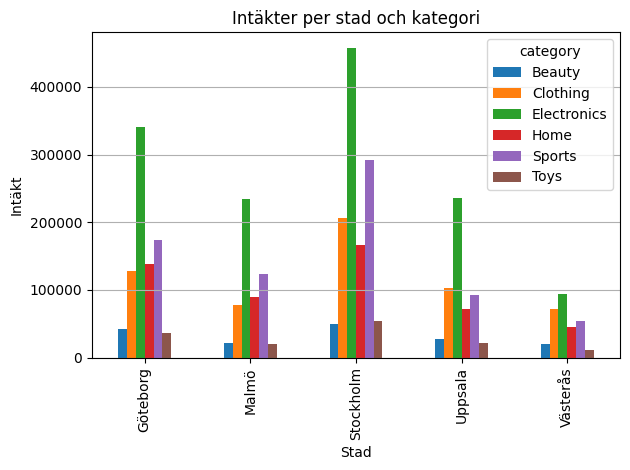

In [16]:
fig, ax = plt.subplots()
category_per_city.plot(kind='bar', ax=ax)
ax.set_title("Intäkter per stad och kategori")
ax.set_xlabel("Stad")
ax.set_ylabel("Intäkt")
ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?
- Vi säljer mest i januari och maj.

In [17]:
revenue_by_month # Shows the total revenue for the different months


month
6    590259.89
5    632165.16
4    580194.83
3    487602.00
2    548462.03
1    664083.32
Name: revenue, dtype: float64

In [18]:
revenue_by_day_of_month # Shows the best selling days of the months

day
9     156486.43
4     142734.92
23    137403.39
7     134633.50
25    130511.88
21    129325.48
10    128955.11
26    128417.60
17    128181.58
16    127302.09
27    126773.85
1     125049.07
3     118576.22
29    116672.81
18    113459.03
13    113412.81
6     112371.59
24    109436.14
28    108897.74
19    108571.86
8     107904.44
22    105843.54
20    104509.51
15     97686.86
2      97440.77
12     94719.45
5      86780.50
14     86106.95
11     84378.76
30     81256.48
31     58966.87
Name: revenue, dtype: float64

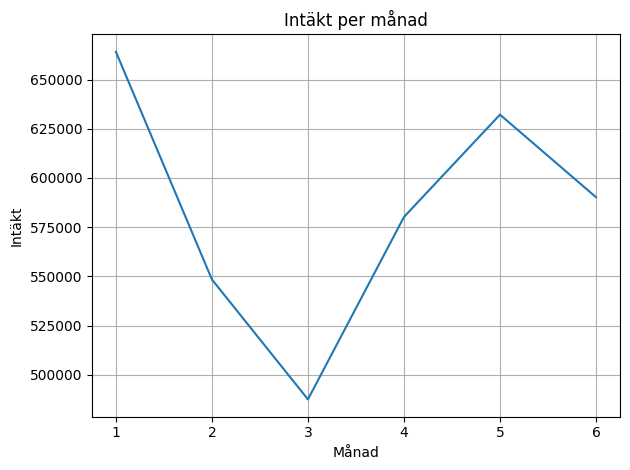

In [19]:
plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel("Månad")
plt.ylabel("Intäkt")
plt.title("Intäkt per månad")
plt.grid(True)
plt.tight_layout()
plt.show()


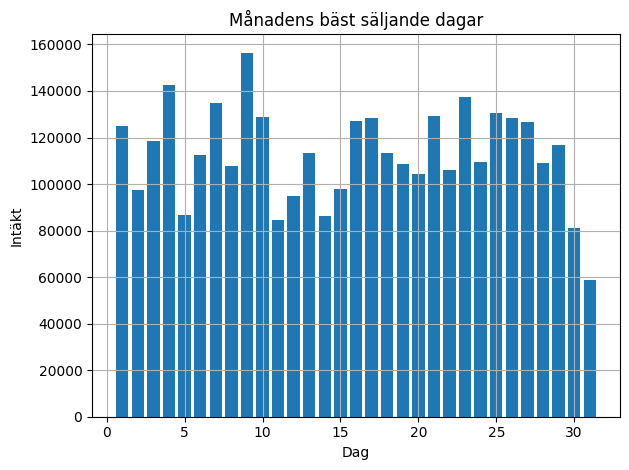

In [20]:
plt.bar(revenue_by_day_of_month.index, revenue_by_day_of_month.values)
plt.xlabel("Dag")
plt.ylabel("Intäkt")
plt.title("Månadens bäst säljande dagar")
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Hur ser en typisk order ut? – AOV (Average Order Value) och spridning.
- Genomsnittligt ordervärde: 1401 kr.

Genomsnittligt ordervärde: 1401 kr
Standardavvikelse: 1166 kr
Lägsta ordervärdet: 50 kr
Högsta ordervärdet: 9192 kr


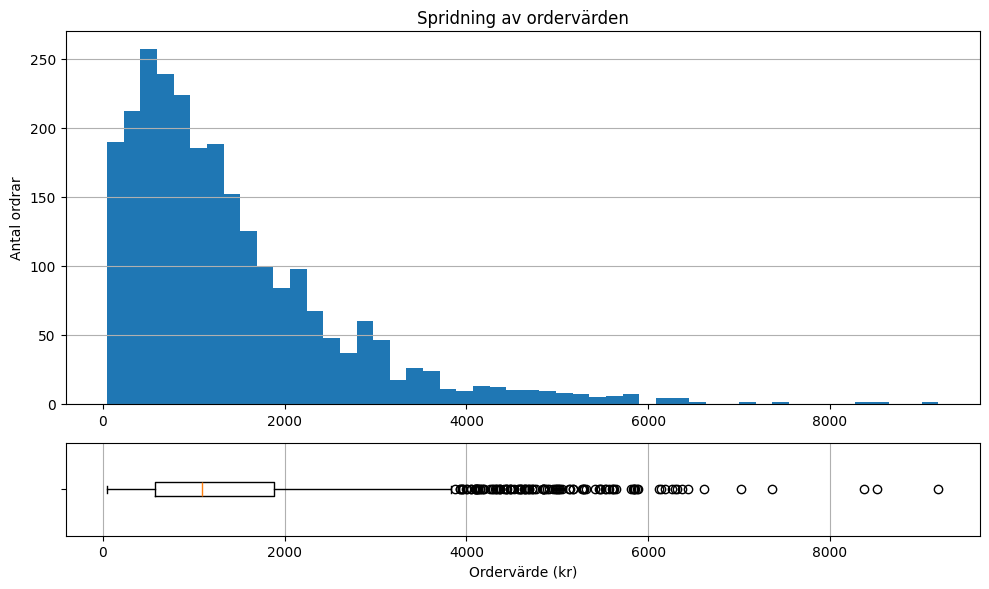

In [21]:

# AOV, standard deviation, minimum and maximum order value
order_value = df["revenue"].agg(["mean", "std", "min", "max"])
order_value.index = [
        "Genomsnittligt ordervärde:",
        "Standardavvikelse:",
        "Lägsta ordervärdet:",
        "Högsta ordervärdet:"
    ]
for name, value in order_value.astype(int).items():
  print(f"{name} {value} kr")


#Distribution of order values
fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={"height_ratios":[4,1]})

ax_hist.hist(df["revenue"], bins=50)
ax_hist.set_title("Spridning av ordervärden")

ax_hist.set_ylabel("Antal ordrar")
ax_hist.grid(True, axis="y")

ax_box.boxplot(df["revenue"], vert=False)
ax_box.set_xlabel("Ordervärde (kr)")
ax_box.set_yticklabels("")
ax_box.grid(True, axis="x")

plt.tight_layout()



### 5. Topp-listor – topp-3 kategorier efter intäkt.

- **Topp-kategorier:** 1. Electronics, 2. Sports, 3. Clothing.

Top 3 kategorier baserat på omsättning:
category
Electronics    1364228.07
Sports          734653.42
Clothing        586744.91
Name: revenue, dtype: float64

Total omsättning: 3502767.2300000004 (avrundad till 3503000)


NameError: name 'ticker' is not defined

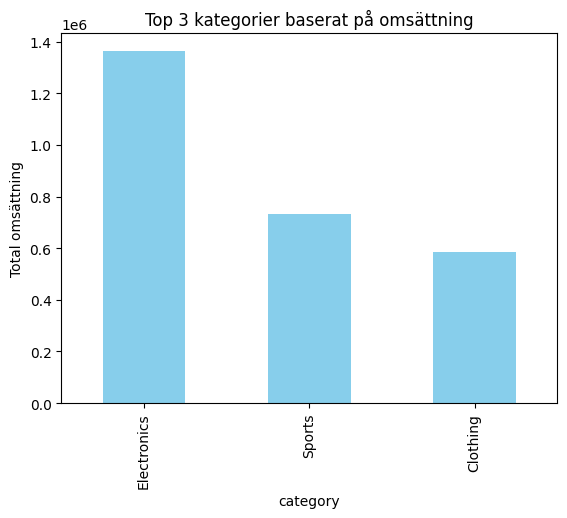

In [22]:
# Summera intäkt per kategori
kategori_sum = df.groupby("category")["revenue"].sum()

# Plocka fram topp 3
top3 = kategori_sum.nlargest(3)

# Totala intäkten (avrundad uppåt till närmaste 500, med min 1000)
total = kategori_sum.sum()
total_rounded = max(1000, int(np.ceil(total / 500.0) * 500))

print("Top 3 kategorier baserat på omsättning:")
print(top3)
print(f"\nTotal omsättning: {total} (avrundad till {total_rounded})")

kategori_sum = df.groupby("category")["revenue"].sum()
top3 = kategori_sum.nlargest(3)
top3.plot(kind="bar", color="skyblue")

plt.title("Top 3 kategorier baserat på omsättning")
plt.ylabel("Total omsättning")

# Visa hela tal istället för 1e6
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?


In [ ]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

daily_revenue = (
    df.set_index("date")
      .sort_index()["revenue"]
      .resample("D")
      .sum()
)

print("Antal dagar som analyseras:", daily_revenue.shape[0])

In [ ]:
Z = 3.0
anomalies, z = detect_anomalies(daily_revenue, threshold=Z)

In [ ]:
viz.plot_anomalies(daily_revenue, anomalies, z, Z)

Figur 1 visar daglig intäkt, där röda punkter markerar dagar som avviker kraftigt från det normala.  
Figur 2 visar motsvarande Z-poäng, där de röda strecken markerar gränsen för +/-3 standardavvikelser.

### Slutsatser och rekommendationer:

- **Topp-kategorier:** 1. Electronics, 2. Sports, 3. Clothing
- **Topp-städer:** 1. Stockholm, 2. Göteborg, 3. Malmö
- **Säsongstopp:** Januari

- Satsa på kategori 'Electronics' i Stockholm under januari.
- Undersök varför vi säljer sämre i mars.
- Undersök varför kategorierna 'Toys' och 'Beauty' säljer sämre.